In [448]:
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt
import matplotlib.cm as cm
from astropy.io import fits as pf
from astropy.io import ascii
import random
from astropy.table import Table, Column
from itertools import izip

datadir = 'Data'

Problem 1
 
(a)
 
Alpha Matrix =  [[  2.00000000e+00   9.74975275e+01]
 [  9.74975275e+01   6.25141612e+03]]
 
Beta Vector =  [[ -19.07267259]
 [-374.15702405]]
 
(b)
 
Covariance Matrix =  [[  2.08584648e+00  -3.25310090e-02]
 [ -3.25310090e-02   6.67319672e-04]]
 
a_0 = -27.610961 +- 1.444246
a_1 = 0.370771 +- 0.025833
 
(c)
 


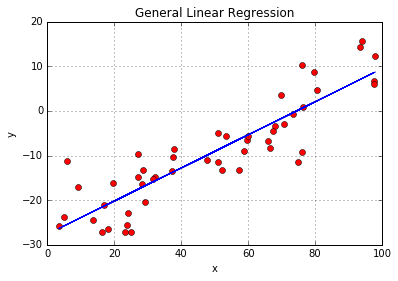

 
(d)
 
 
Chi squared = 55.784209
Reduced Chi Squared = 1.162171
 
This is a reasonable fit since the reduced chi squared is near one, though it could probably be improved.


In [449]:
print 'Problem 1'

datfile = 'xy_fitting.txt'
xydat = ascii.read('%s/%s'%(datadir,datfile))

xdat = xydat['col1']
ydat = xydat['col2']
ysig = 5.0
ylen = len(ydat)

a11 = ylen*((1/ysig)**2.)
a12 = sum(xdat/(ysig)**2.)
a21 = a12
a22 = sum((xdat/ysig)**2.)
alpha = np.matrix([[a11,a12],[a21,a22]])
alphainv = alpha.I

b1 = sum(ydat/(ysig)**2.)
b2 = sum((xdat*ydat)/(ysig)**2.)
beta = np.matrix([[b1],[b2]])


params = alphainv*beta
a0 = float(params[0])
a1 = float(params[1])

model = a0 + a1*xdat

print ' '
print '(a)'
print ' '
print 'Alpha Matrix = ',alpha
print ' '
print 'Beta Vector = ',beta


print ' '
print '(b)'
print ' '

print 'Covariance Matrix = ',alphainv

a0sig = np.sqrt(alphainv[0,0])
a1sig = np.sqrt(alphainv[1,1])
print ' '
print 'a_0 = %f +- %f'%(a0,a0sig)
print 'a_1 = %f +- %f'%(a1,a1sig)


print ' '
print '(c)'
print ' '

plt.title('General Linear Regression')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.plot(xdat,ydat,'ro')
plt.plot(xdat,model)
plt.show()


print ' '
print '(d)'
print ' '

nu = ylen - 2
chi2 = sum( ((ydat-model)/ysig)**2. )
rchi2 = chi2/nu

print ' '
print 'Chi squared = %f'%(chi2)
print 'Reduced Chi Squared = %f'%(rchi2)
print ' '
print 'This is a reasonable fit since the reduced chi squared is near one, though it could probably be improved.'

Problem 2
 
(a)
 


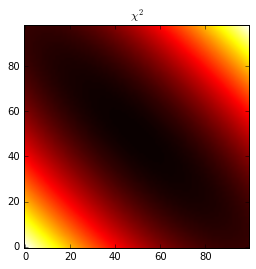

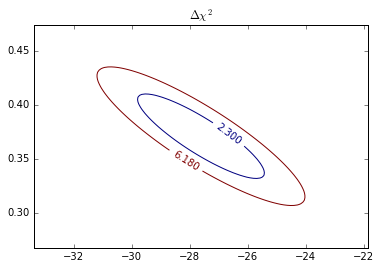

These contours are the 68% and 95.4% confidence regions for a 2 parameter fit.
 
(b)
 


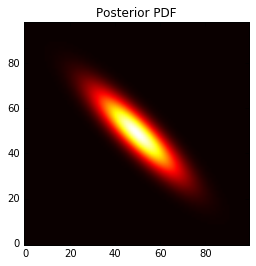

95.4% and 68% Confidence Regions =  [  9.73010172e-05   6.85611151e-04]


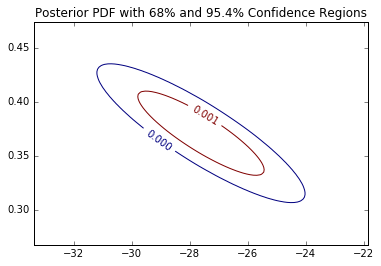

This plot is in agreement with the delta chi squared confidence regions.


In [429]:
print 'Problem 2'

print ' '
print '(a)'
print ' '

lowa0 = a0 - 4.0*a0sig
hia0 = a0 + 4.0*a0sig

lowa1 = a1 - 4.0*a1sig
hia1 = a1 + 4.0*a1sig

_a0 = np.linspace(lowa0, hia0, 100,retstep=True)
_a1 = np.linspace(lowa1, hia1, 99,retstep=True)
step0=_a0[1]
step1=_a1[1]

a0mesh, a1mesh = np.meshgrid(_a0[0], _a1[0])
 

y_3d = np.empty([50,99,100])
y_3d[:,:,:] = ydat[:,np.newaxis,np.newaxis]

a0_3d = np.empty([50,99,100])
a0_3d[:,:,:] = a0mesh

a1_3d = np.empty([50,99,100])
a1_3d[:,:,:] = a1mesh
a1_3d[:,:,:] = a1_3d*xdat[:,np.newaxis,np.newaxis]

model_3d = a0_3d + a1_3d


chi2_2d = np.sum((y_3d - model_3d)**2.,axis=0)/ysig**2.

#print chi2_2d
#print chi2_2d.shape


plt.imshow(chi2_2d, origin='lower', cmap=cm.hot)
plt.title('$\chi^2$')
plt.show()


z = chi2_2d - chi2
levels = [2.3,6.18]

plt.figure()
plt.plot()
CS = plt.contour(a0mesh, a1mesh, z, levels)
plt.clabel(CS, inline=1, fontsize=10)
plt.title('$\Delta\chi^2$')
plt.show()

print 'These contours are the 68% and 95.4% confidence regions for a 2 parameter fit.'

print ' '
print '(b)'
print ' '


a0prior = 1./(hia0 - lowa0)
a1prior = 1./(hia1 - lowa1)
const = 1./(np.sqrt(2*np.pi)*ysig)
pixela = step0*step1

postpdf = a0prior*a1prior*pixela*const*np.exp(-0.5*chi2_2d)
post_norm = postpdf/np.sum(postpdf)
plt.imshow(post_norm, origin='lower', cmap=cm.hot)
plt.title('Posterior PDF')
plt.show()


post_1d = post_norm.flatten()
post_sort1d = np.sort(post_1d)[::-1]


post_sum = np.cumsum(post_sort1d)
mask = (post_sum > 0.68)
mask2 = (post_sum > 0.954)
cont68 = post_sort1d[mask][0]
cont95 = post_sort1d[mask2][0]
levels = np.sort([cont68,cont95])
print '95.4% and 68% Confidence Regions = ',levels


plt.figure()
plt.plot()
CS = plt.contour(a0mesh, a1mesh, post_norm, levels)
plt.clabel(CS, inline=1, fontsize=10)
plt.title('Posterior PDF with 68% and 95.4% Confidence Regions')
plt.show()

print 'This plot is in agreement with the delta chi squared confidence regions.'


Problem 3
 
(a)
 
delta chi squared = 1 region for a0:  [-29.06979569 -26.15212703]
delta chi squared = 1 region for a1:  [ 0.34335683  0.39818506]
However, these limits clearly do not enclose 68% of the data, and I am not sure why.


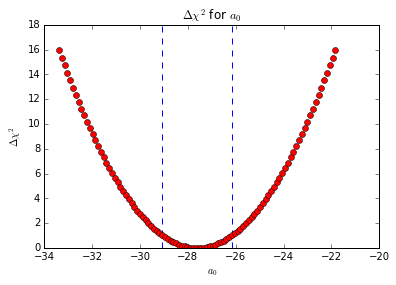

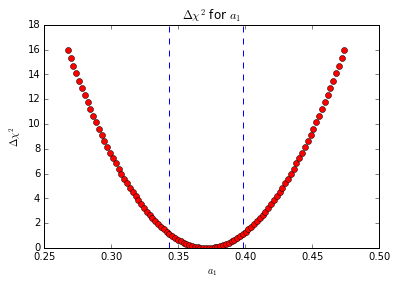

 
(a)
 


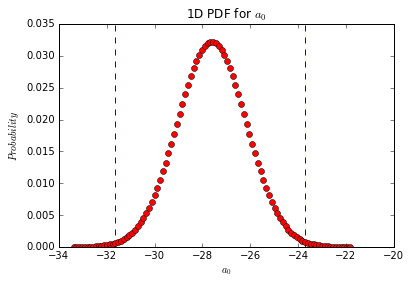

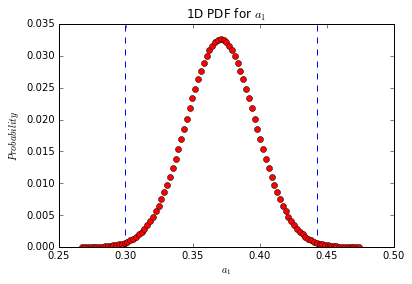

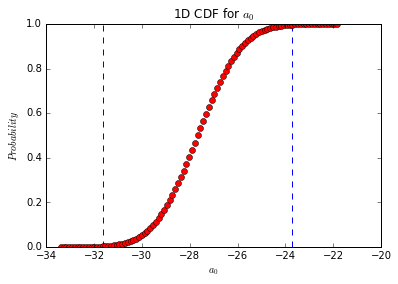

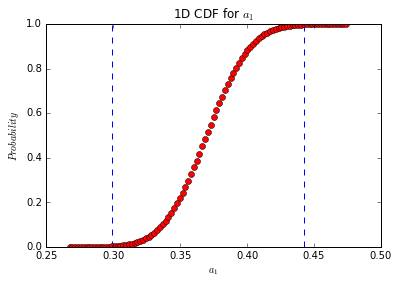

In [525]:
print 'Problem 3'

print ' '
print '(a)'
print ' '

a0mins = []
a1mins = []


for col in range(len(z[0,:])):
    a0mins.append(min(z[:,col]))

for row in range(len(z[:,0])):
    a1mins.append(min(z[row,:]))

a0mins = np.array(a0mins)
a1mins = np.array(a1mins)

mask0 = (a0mins > 1.) & (a0mins < 1.1)
mask1 = (a1mins > 1.) & (a1mins < 1.2)
conf0 = np.sort(_a0[0][mask0])
conf1 = np.sort(_a1[0][mask1])

print 'delta chi squared = 1 region for a0: ',conf0
print 'delta chi squared = 1 region for a1: ',conf1

print 'However, these limits clearly do not enclose 68% of the data, and I am not sure why.'

plt.title('$\Delta\chi^2$ for $a_0$')
plt.xlabel('$a_0$')
plt.ylabel('$\Delta\chi^2$')
plt.axvline(x=conf0[0], color='b', linestyle='--')
plt.axvline(x=conf0[1], color='b', linestyle='--')
plt.plot(_a0[0],a0mins,'ro')
plt.show()



plt.title('$\Delta\chi^2$ for $a_1$')
plt.xlabel('$a_1$')
plt.ylabel('$\Delta\chi^2$')
plt.axvline(x=conf1[0], color='b', linestyle='--')
plt.axvline(x=conf1[1], color='b', linestyle='--')
plt.plot(_a1[0],a1mins,'ro')
plt.show()



print ' '
print '(a)'
print ' '

a0_1d = np.sum(post_norm,axis=0)
a1_1d = np.sum(post_norm,axis=1)

a0_cdf = np.cumsum(a0_1d)
a1_cdf = np.cumsum(a1_1d)



plt.title('1D PDF for $a_0$')
plt.xlabel('$a_0$')
plt.ylabel('$Probability$')
plt.axvline(x=_a0[0][15], color='b', linestyle='--')
plt.axvline(x=_a0[0][83], color='b', linestyle='--')
plt.plot(_a0[0],a0_1d,'ro')
plt.show()



plt.title('1D PDF for $a_1$')
plt.xlabel('$a_1$')
plt.ylabel('$Probability$')
plt.axvline(x=_a1[0][15], color='b', linestyle='--')
plt.axvline(x=_a1[0][83], color='b', linestyle='--')
plt.plot(_a1[0],a1_1d,'ro')
plt.show()


plt.title('1D CDF for $a_0$')
plt.xlabel('$a_0$')
plt.ylabel('$Probability$')
plt.axvline(x=_a0[0][15], color='b', linestyle='--')
plt.axvline(x=_a0[0][83], color='b', linestyle='--')
plt.plot(_a0[0],a0_cdf,'ro')
plt.show()



plt.title('1D CDF for $a_1$')
plt.xlabel('$a_1$')
plt.ylabel('$Probability$')
plt.axvline(x=_a1[0][15], color='b', linestyle='--')
plt.axvline(x=_a1[0][83], color='b', linestyle='--')
plt.plot(_a1[0],a1_cdf,'ro')
plt.show()